Elaborar una red neuronal capaz de reconocer los numeros del 0 al 9 utilizando la base de datos MNIST.

El clasificador debe ser entrenado hasta una fidelidad de reconocimiento de 99% o mayor, esto debe realizarse en autamatico, sin fijar manualmente los epochs, una vez que se llegue a ese nivel de fidelidad, detener el entrenamiento y mostrar por pantalla el nivel de fidelidad alcanzado y que se detuvo el entrenamiento.

Nota: deberian llegar a este nivel de fidelidad en aproximadamente 10 epochs

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image, ImageOps

In [2]:
class myCallback (tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')) > 0.99:
            print("\n Reached " , int(logs.get('accuracy')*100) ,"% of Accuracy. Training finished! c: ", sep=' ')
            self.model.stop_training = True
            
callbacks = myCallback()      

In [3]:
mnist = tf.keras.datasets.mnist

In [16]:
image = Image.open('ocho.png')
image = ImageOps.grayscale(image)
image = ImageOps.invert(image)
imagearray = np.array(image)

In [5]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136 244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253 238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 253 237 200  57 

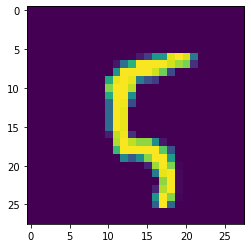

In [6]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[100])
print(training_labels[100])
print(training_images[100])

In [8]:
training_images = training_images/255.0
test_images = test_images/255.0
imagearray = imagearray/255.0

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)]) 

In [10]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
model.fit(training_images, training_labels, epochs=15, callbacks = [callbacks])

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1450 - accuracy: 0.7284
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4771 - accuracy: 0.8745
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3790 - accuracy: 0.8952
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3385 - accuracy: 0.9043
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3145 - accuracy: 0.9107
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.9144
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2841 - accuracy: 0.9182
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9215
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2625 - accuracy: 0.9238
Epoch 10/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.252

In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2076 - accuracy: 0.9385


[0.20757406949996948, 0.9384999871253967]

In [13]:
classifications = model.predict(test_images)
print(classifications[0])

[3.5306679e-05 3.6862657e-09 1.6846973e-04 1.8867815e-03 6.8255495e-08 2.7843449e-05 1.1998881e-10 9.9750608e-01 1.0088595e-05 3.6541891e-04]


In [ ]:
print(test_labels[0])

7


In [17]:
imagearray = imagearray.reshape([1, 784])

In [18]:
predict = model.predict(imagearray)
print(predict)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
